In [9]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf

In [10]:
df = pd.read_csv(r"C:\Users\aacjp\Downloads\2016.csv")
df

,Country,Region,Happiness_Rank,Happiness_Score,Lower_CI,Upper_CI,GDP(per_capita),Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [11]:
W = df.drop(['Country', 'Region', 'Happiness_Rank', 'Lower_CI', 'Upper_CI'], axis='columns')
W.head()

,Happiness_Score,GDP(per_capita),Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [12]:
reg = linear_model.LinearRegression()
reg.fit(W.drop('Happiness_Score',axis='columns'),W.Happiness_Score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg.coef_

array([0.99999088, 1.00002422, 0.99985263, 1.00016829, 0.99970066,
       1.00017439, 0.99994759])

In [14]:
reg.intercept_

0.0001357357434850215

In [15]:
reg.predict([[0.06831, 0.23442, 0.15747, 0.04320, 0.09419, 0.20290, 2.10404]])

array([2.90455176])

In [16]:
reg.predict([[1, 1, 0.66, 0.5, 0.5, 0.5, 2.5]])

array([6.65994421])

In [17]:
reg.predict([[1.44178, 1.16374, 0.79504, 0.57941, 0.44453, 0.36171, 2.73939]])

array([7.52551755])

In [18]:
reg.predict([[1.5, 1.2, 0.8, 0.6, 0.5, 0.4, 2.8]])

array([7.79990753])

In [19]:
reg.predict([[1.4, 1.1, 0.7, 0.5, 0.4, 0.3, 2.7]])

array([7.09992167])

In [20]:
W.shape

(157, 8)

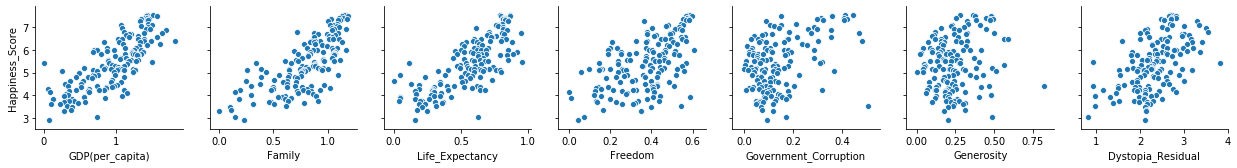

In [21]:
sns.pairplot(W, x_vars=['GDP(per_capita)','Family','Life_Expectancy', 'Freedom', 'Government_Corruption', 'Generosity', 'Dystopia_Residual' ], y_vars='Happiness_Score')

In [22]:
from sklearn.metrics import mean_absolute_error
y_true = [7.526]
y_pred = [7.52551755]
mean_absolute_error(y_true, y_pred)

0.0004824499999998011